# Manim

In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython==8.21.0

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,301 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,644 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu 

In [ ]:
from manim import *

In [ ]:
%%manim -qm -v WARNING SquareToCircle

class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

Manim Community v0.19.0

## Manim for a bunch of Sections

In [ ]:
from manim import *

#### 24 hr Clock

In [ ]:
%%manim -qm -v WARNING TwentyFourHourClock


class TwentyFourHourClock(Scene):
    def construct(self):
        # Create the clock face
        clock_face = Circle(radius=3, color=WHITE)
        self.play(Create(clock_face))

        # Add hour markers
        hour_markers = VGroup()
        for hour in range(24):
            angle = (hour / 24) * TAU  # Convert hour to angle
            marker = Line(
                start=3 * UP,  # Outer radius of the clock
                end=2.8 * UP,  # Slightly inward for the marker
                color=WHITE
            ).rotate(angle, about_point=ORIGIN)
            hour_markers.add(marker)
        self.play(Create(hour_markers))

        # Add clock hands
        hour_hand = Line(ORIGIN, 1.5 * UP, color=BLUE, stroke_width=6)
        minute_hand = Line(ORIGIN, 2 * UP, color=GREEN, stroke_width=4)
        second_hand = Line(ORIGIN, 2.5 * UP, color=RED, stroke_width=2)

        hands = VGroup(hour_hand, minute_hand, second_hand)
        self.play(Create(hands))

        # Animate the hands
        def update_hands(hands, dt):
            # Time tracking in seconds
            current_time = self.time_elapsed

            # Calculate angles for hands (normalized for 24-hour time)
            second_angle = (current_time % 60) / 60 * TAU
            minute_angle = (current_time % 3600) / 3600 * TAU
            hour_angle = (current_time % 86400) / 86400 * TAU

            # Rotate hands to reflect the time
            hands[2].rotate(second_angle - hands[2].get_angle(), about_point=ORIGIN)
            hands[1].rotate(minute_angle - hands[1].get_angle(), about_point=ORIGIN)
            hands[0].rotate(hour_angle - hands[0].get_angle(), about_point=ORIGIN)

        # Keep track of time and apply updates
        self.time_elapsed = 0  # Initialize elapsed time in seconds

        def increment_time(dt):
            self.time_elapsed += dt

        hands.add_updater(update_hands)
        self.add(hands)
        self.add_updater(increment_time)

        # Run the animation for 24 hours (adjust playback speed as needed)
        self.wait(15)  # Simulate 24 hours, sped up 100x

        # Clean up
        hands.remove_updater(update_hands)
        self.remove_updater(increment_time)


Manim Community v0.19.0

#### Graph with moving dots for Rhythm and Cortisol throughout the day


In [ ]:
%%manim -qm -v WARNING GraphForRhythmAndCortisol



class GraphForRhythmAndCortisol(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 24, 1],  # 24 hours
            y_range=[-2, 2, 0.5],
            axis_config={"include_tip": False},
        )
        time_labels = VGroup()
        times = ["12 AM", "3 AM", "6 AM", "9 AM", "12 PM", "3 PM", "6 PM", "9 PM", "12 AM"]
        for i, time in enumerate(times):
            label = Text(time, font_size=18).next_to(ax.c2p(i * 3, 0), DOWN)
            time_labels.add(label)
        rhythm_label = ax.get_axis_labels(x_label="Time Period", y_label="Rhythm")

        t = ValueTracker(0)

        # Define a weird function for the line initially
        def weird_func(x):
            return np.sin(x) * np.cos(3 * x) + 0.2 * np.sin(5 * x)

        # Define a normal function (sine wave) for after 7 AM
        def normal_func(x):
            return np.sin(x)

        # Define a linear function peaking at 7 AM and then dying down
        def linear_peak_func(x):
            if x <= 7:
                return 0.1  # Linear increase to the peak
            else:
                return max(0, (24 - x) / 17)  # Linear decrease after the peak

        # Create the graph for the weird function initially
        graph = ax.plot(weird_func, x_range=[0, 24], color=BLUE, stroke_width=2)

        # Add a dot that moves along the graph
        dot = Dot(point=ax.c2p(t.get_value(), weird_func(t.get_value())), color=RED)

        # Update the graph dynamically
        def update_graph(dot):
            x = t.get_value()
            if x < 7:
                y = weird_func(x)
            elif 7 <= x < 24:
                alpha = min((x - 7) / 1, 1)  # Smooth transition over 1 unit
                y = (1 - alpha) * weird_func(x) + alpha * normal_func(x)
            else:
                y = linear_peak_func(x % 24)  # Wrap around for the new graph
            dot.move_to(ax.c2p(x % 24, y))

        dot.add_updater(update_graph)

        # Update the graph line dynamically for smooth transition
        def update_line(mob):
            x = t.get_value()
            if x < 7:
                new_graph = ax.plot(weird_func, x_range=[0, 24], color=BLUE, stroke_width=2)
            elif 7 <= x < 24:
                alpha = min((x - 7) / 1, 1)  # Smooth transition over 1 unit
                transition_func = lambda x: (1 - alpha) * weird_func(x) + alpha * normal_func(x)
                new_graph = ax.plot(transition_func, x_range=[0, 24], color=BLUE, stroke_width=2)
            else:
                alpha = min((x - 7) / 1, 1)  # Smooth transition over 1 unit
                transition_func = lambda x: (1 - alpha) * normal_func(x) + alpha * linear_peak_func(x)
                new_graph = ax.plot(transition_func, x_range=[0, 24], color=GREEN, stroke_width=2)
            mob.become(new_graph)

        graph.add_updater(update_line)

        # Update the y-axis label during the transition to the linear graph
        def update_y_label(scene):
            new_label = ax.get_axis_labels(x_label="Time Period", y_label="Cortisol")
            self.play(FadeTransform(rhythm_label, new_label))
            return new_label

        self.add(ax, rhythm_label, time_labels, graph, dot)
        self.play(t.animate.set_value(24), run_time=12, rate_func=linear)  # First transition
        new_label = update_y_label(self)  # Change y-axis label
        self.play(t.animate.set_value(48), run_time=12, rate_func=linear)  # Continue to new graph
        self.wait()


Manim Community v0.19.0

#### Graph for Alertness Peak

In [ ]:
%%manim -qm -v WARNING GraphForAlertnessPeak



class GraphForAlertnessPeak(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 24, 1],  # 24 hours
            y_range=[-2, 2, 0.5],
            axis_config={"include_tip": False},
        )
        time_labels = VGroup()
        times = ["12 AM", "3 AM", "6 AM", "9 AM", "12 PM", "3 PM", "6 PM", "9 PM", "12 AM"]
        for i, time in enumerate(times):
            label = Text(time, font_size=18).next_to(ax.c2p(i * 3, 0), DOWN)
            time_labels.add(label)
        rhythm_label = ax.get_axis_labels(x_label="Time Period", y_label="Alertness")

        t = ValueTracker(0)
        # Define a normal function (sine wave) for after 7 AM
        def normal_func(x):
            return np.sin(x)

        # Define a linear function peaking at 7 AM and then dying down
        def linear_peak_func(x):
            if x <= 21:
                return 0.1  # Linear increase to the peak
            else:
                return max(0, (24 - x) / 4.5)  # Linear decrease after the peak

        # Create the graph for the weird function initially
        graph = ax.plot(normal_func, x_range=[0, 24], color=BLUE, stroke_width=2)

        # Add a dot that moves along the graph
        dot = Dot(point=ax.c2p(t.get_value(), normal_func(t.get_value())), color=RED)

        # Update the graph dynamically
        def update_graph(dot):
            x = t.get_value()
            if x < 21:
                y = normal_func(x)
            else:
                alpha = min((x - 7) / 1, 1)  # Smooth transition over 1 unit
                y = (1 - alpha) * normal_func(x) + alpha * linear_peak_func(x % 24)

            dot.move_to(ax.c2p(x % 24, y))

        dot.add_updater(update_graph)

        # Update the graph line dynamically for smooth transition
        def update_line(mob):
            x = t.get_value()
            if x < 21:
                new_graph = ax.plot(normal_func, x_range=[0, 24], color=BLUE, stroke_width=2)
            else:
                alpha = min((x - 7) / 1, 1)  # Smooth transition over 1 unit
                transition_func = lambda x: (1 - alpha) * normal_func(x) + alpha * linear_peak_func(x)
                new_graph = ax.plot(transition_func, x_range=[0, 24], color=BLUE, stroke_width=2)
            mob.become(new_graph)

        graph.add_updater(update_line)
        self.add(ax, rhythm_label, time_labels, graph, dot)
        self.play(t.animate.set_value(24), run_time=12, rate_func=linear)  # First transition
        self.wait()


Manim Community v0.19.0

#### Graph for Alertness Dips

In [ ]:
%%manim -qm -v WARNING GraphForAlertDips



class GraphForAlertDips(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 24, 1],  # 24 hours
            y_range=[-2, 2, 0.5],
            axis_config={"include_tip": False},
        )
        time_labels = VGroup()
        times = ["0 mins", "30 mins", "60 mins", "90 mins", "120 mins"]
        for i, time in enumerate(times):
            label = Text(time, font_size=18).next_to(ax.c2p(i * 6, 0), DOWN)
            time_labels.add(label)
        rhythm_label = ax.get_axis_labels(x_label="Time Period", y_label="Alertness")

        t = ValueTracker(0)

        # Define a normal function (sine wave) for after 7 AM
        def normal_func(x):
            return np.sin(x)


        # Create the graph for the weird function initially
        graph = ax.plot(normal_func, x_range=[0, 24], color=BLUE, stroke_width=2)

        # Add a dot that moves along the graph
        dot = Dot(point=ax.c2p(t.get_value(), normal_func(t.get_value())), color=RED)

        # Update the graph dynamically
        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), normal_func(t.get_value()))))


        self.add(ax, rhythm_label, time_labels, graph, dot)
        self.play(t.animate.set_value(24), run_time=12, rate_func=linear)  # First transition
        self.wait()


Manim Community v0.19.0

#### Graph for Alertness Dips With Cam

In [ ]:
%%manim -qm -v WARNING GraphForAlertDipsWithCam



class GraphForAlertDipsWithCam(MovingCameraScene):
    def construct(self):
        self.camera.frame.save_state()
        ax = Axes(
            x_range=[0, 24, 1],  # 24 hours
            y_range=[-2, 2, 0.5],
            axis_config={"include_tip": False},
        )
        time_labels = VGroup()
        times = ["0 mins", "30 mins", "60 mins", "90 mins", "120 mins"]
        for i, time in enumerate(times):
            label = Text(time, font_size=18).next_to(ax.c2p(i * 6, 0), DOWN)
            time_labels.add(label)
        rhythm_label = ax.get_axis_labels(x_label="Time Period", y_label="Alertness")

        t = ValueTracker(0)

        # Define a normal function (sine wave) for after 7 AM
        def normal_func(x):
            return np.sin(x)


        # Create the graph for the weird function initially
        graph = ax.plot(normal_func, x_range=[0, 24], color=BLUE, stroke_width=2)

        moving_dot = Dot(ax.i2gp(graph.t_min, graph), color=ORANGE)
        dot_1 = Dot(ax.i2gp(graph.t_min, graph))
        dot_2 = Dot(ax.i2gp(graph.t_max, graph))

        self.add(ax, graph, dot_1, dot_2, moving_dot, rhythm_label, time_labels)
        self.play(self.camera.frame.animate.scale(1).move_to(moving_dot), run_time=2)

        def update_curve(mob):
            mob.move_to(moving_dot.get_center())

        self.camera.frame.add_updater(update_curve)
        self.play(t.animate.set_value(24),
                  ChangeSpeed(
                      MoveAlongPath(moving_dot, graph, rate_func=linear),
                    speedinfo={0: 0.3, 0.4: 0.1, 0.6: 0.1, 1: .1},
                    rate_func=linear,
            ))
        self.camera.frame.remove_updater(update_curve)

        self.play(Restore(self.camera.frame))


Manim Community v0.19.0

#### Graph for Growth and Fixed Mindset With Cam

In [ ]:
%%manim -qm -v WARNING GraphWithCameraGrowthFixed

class GraphWithCameraGrowthFixed(MovingCameraScene):
    def construct(self):
        # Create axes
        ax = Axes(
            x_range=[0, 50, 5],
            y_range=[0, 5, 1],
            axis_config={"include_tip": False},
        )
        ax_labels = ax.get_axis_labels(x_label="Your Life", y_label="Growth")

        # Define the functions for the graph segments
        def linear_func(x):
            return 2.01 if x == 14 else 2 # Linear function for the first segment

        def func_1(x):
            return (np.sin(0.2 * x) + 2.75 ) # Sine wave for the second segment

        def func_2(x):
            return 0.05 * (x - 30)**2 - 3  # Parabola for the third segment

        def func_3(x):
            return np.log(x - 44) + 2 if x > 44 else 2  # Logarithmic function for the fourth segment

        # Plot the graph segments
        graph_linear = ax.plot(linear_func, x_range=[0, 20], color=RED, stroke_width=4)
        graph_func_1 = ax.plot(func_1, x_range=[20, 50], color=GREEN, stroke_width=4)
        graph_func_2 = ax.plot(func_2, x_range=[20, 50], color=GREEN, stroke_width=4)
        graph_func_3 = ax.plot(func_3, x_range=[20, 50], color=GREEN, stroke_width=4)

        # Add axes and graphs to the scene
        self.add(ax, ax_labels, graph_linear)

        # Create a moving dot
        moving_dot = Dot(color=YELLOW)
        self.add(moving_dot)

        # Define a function to update the dot's position
        def update_dot(mob, alpha):
            # Define proportions for each segment
            if alpha <= 0.25:
                proportion = alpha * 4
                mob.move_to(graph_linear.point_from_proportion(proportion))
            elif alpha <= 0.5:
                proportion = (alpha - 0.25) * 4
                self.add(graph_func_1)
                mob.move_to(graph_func_1.point_from_proportion(proportion))
            elif alpha <= 0.75:
                proportion = (alpha - 0.5) * 4
                self.add(graph_func_2)
                mob.move_to(graph_func_2.point_from_proportion(proportion))
            else:
                proportion = (alpha - 0.75) * 4
                self.add(graph_func_3)
                mob.move_to(graph_func_3.point_from_proportion(proportion))


        # Add a camera updater to follow the dot
        self.camera.frame.add_updater(lambda mob: mob.move_to(moving_dot.get_center()))

        # Animate the dot moving along the full piecewise graph
        self.play(
            UpdateFromAlphaFunc(moving_dot, update_dot),
            self.camera.frame.animate.scale(0.9).move_to(graph_func_1.point_from_proportion(0.5)),
            run_time=10,
            rate_func=linear,
        )

        # Remove the updater after the animation
        self.camera.frame.remove_updater(lambda mob: mob.move_to(moving_dot.get_center()))

        # Zoom out after the animation
        self.play(self.camera.frame.animate.scale(1.5).move_to(ax.c2p(25, 2.5)), run_time=1)

        self.wait()


Manim Community v0.19.0

#### Puzzle Transformation

In [ ]:
%%manim -qm -v WARNING PuzzleTransformation

class PuzzleTransformation(Scene):
    def construct(self):
        # Create the large square with a circular hole
        large_square = Square(side_length=4, color=BLUE)
        hole = Circle(radius=0.5, color=GRAY, fill_opacity=.7).move_to(large_square.get_center())
        large_square_with_hole = VGroup(large_square, hole)

        # Create the small square
        small_square = Square(side_length=1, color=YELLOW).shift(RIGHT * 3)
        large_label = Text("My Life", font_size=48).next_to(large_square_with_hole, UP)
        small_label = Text("Tool", font_size=24).next_to(small_square, DOWN)

        # Add the large square and small square to the scene
        self.play(
            Create(large_square_with_hole),
            Write(large_label),
            Create(small_square),
            Write(small_label))
        self.wait(1)

        # Transform the small square into a circle
        small_circle = Circle(radius=0.5, color=YELLOW, fill_opacity=.7).move_to(small_square.get_center())
        self.play(Transform(small_square, small_circle))

        # Move the circle into the hole
        self.play(small_circle.animate.move_to(hole.get_center()))
        self.wait(1)

        # Highlight the completed puzzle
        highlight = SurroundingRectangle(large_square, color=GREEN, buff=0.2)
        self.play(Create(highlight))
        self.wait(2)


Manim Community v0.19.0

#### Linear Transform for Zones of Challenge and Comfort

In [ ]:
%%manim -qm -v WARNING LinearPlateauGraph

class LinearPlateauGraph(Scene):
    def construct(self):
        # Axes
        ax = Axes(
            x_range=[0, 10, 1],
            y_range=[0, 10, 1],
            x_length=7,
            y_length=6,
            axis_config={"include_tip": False},
        ).add_coordinates()

        # Graph function: Linear until x=5, then plateau
        plateau_x_start = 5
        plateau_y = 6

        def linear_plateau(x):
            return plateau_y if x >= plateau_x_start else (plateau_y / plateau_x_start) * x

        graph = ax.plot(linear_plateau, color=YELLOW, x_range=[0, 10])

        # Add the graph to the scene
        self.play(Create(ax), Create(graph))

        # Highlighting the "Challenging" region (from 0 to plateau point)
        challenging_area = ax.get_area(
            graph,
            x_range=[0, plateau_x_start],
            color=BLUE,
            opacity=0.5,
        )
        challenging_label = Text("Zone of Comfort", font_size=24).next_to(challenging_area, UP)

        self.play(FadeIn(challenging_area))
        self.play(Write(challenging_label))

        # Highlighting the "Zone of Challenging" region (under plateau)
        zone_area = ax.get_area(
            graph,
            x_range=[plateau_x_start, 10],
            color=RED,
            opacity=0.5,
        )
        zone_label = Text("Zone of Challenge", font_size=24).next_to(zone_area, UP)

        self.play(FadeIn(zone_area))
        self.play(Write(zone_label))

        # Hold the final frame
        self.wait(3)


Manim Community v0.19.0

#### Linear Transform for Zones For Stress

In [ ]:
%%manim -qm -v WARNING ComfortChallengeStressArea

class ComfortChallengeStressArea(Scene):
    def construct(self):
        # Axes
        ax = Axes(
            x_range=[0, 20, 1],
            y_range=[0, 1, .1],  # Adjusted y-range for a bell curve
            axis_config={"include_tip": False},
        ).add_coordinates()
        ax_labels = ax.get_axis_labels(x_label="Stress", y_label="Performance")
        self.add(ax, ax_labels)

        # Bell curve function
        from math import exp
        mean = 10

        def bell_curve(x):
            # A normalized Gaussian centered at x=5 with a standard deviation of 1.5
            std_dev = 2.5
            return exp(-((x - mean) ** 2) / (2 * std_dev ** 2))

        # Plot the bell curve
        graph = ax.plot(bell_curve, color=YELLOW, x_range=[0, 20])

        # Add the graph to the scene
        self.play(Create(ax), Create(graph))

        # Determine the regions
        left_range = [0, mean - 2]
        right_range = [mean + 2, 20]

        # Before peak (Zone of Comfort)
        comfort_area = ax.get_area(
            graph,
            x_range=left_range,
            color=RED,
            opacity=0.5,
        )
        comfort_label = Text("No Stress", font_size=24).next_to(comfort_area, UP)

        self.play(FadeIn(comfort_area))
        self.play(Write(comfort_label))

        # During peak (Zone of Flow)
        peak_width = 4  # Define a small range around the peak
        peak_area = ax.get_area(
            graph,
            x_range=[mean - peak_width / 2, mean + peak_width / 2],
            color=GREEN,
            opacity=0.5,
        )
        peak_label = Text("Optimal Stress", font_size=24).next_to(peak_area, UP)

        self.play(FadeIn(peak_area))
        self.play(Write(peak_label))

        # After peak (Zone of Stress)
        stress_area = ax.get_area(
            graph,
            x_range=right_range,
            color=RED,
            opacity=0.5,
        )
        stress_label = Text("Stress Overload", font_size=24).next_to(stress_area, UP)

        self.play(FadeIn(stress_area))
        self.play(Write(stress_label))

        # Hold the final frame
        self.wait(3)


Manim Community v0.19.0

#### Linear Transform for Zones of Stress with Shifting

In [ ]:
%%manim -qm -v WARNING ComfortChallengeStressAreaWithShift

class ComfortChallengeStressAreaWithShift(Scene):
    def construct(self):
        # Axes
        ax = Axes(
            x_range=[0, 20, 1],
            y_range=[0, 1.5, .1],  # Adjusted y-range for a bell curve
            axis_config={"include_tip": False},
        ).add_coordinates()
        ax_labels = ax.get_axis_labels(x_label="Stress", y_label="Performance")
        self.add(ax, ax_labels)

        # Bell curve function
        from math import exp
        mean_tracker = ValueTracker(10)

        def bell_curve(x):
            # A normalized Gaussian centered at x=5 with a standard deviation of 1.5
            std_dev = 2.5
            return exp(-((x - mean_tracker.get_value() ) ** 2) / (2 * std_dev ** 2))

        # Plot the bell curve
        # graph = ax.plot(bell_curve, color=YELLOW, x_range=[0, 20])
        graph = always_redraw(lambda: ax.plot(
            lambda x: bell_curve(x),
            color=YELLOW, x_range=[0, 20]
        ))
        self.add(graph)

        # Add the graph to the scene
        self.play(Create(ax))


        # Determine the regions
        left_range = [0, mean_tracker.get_value() - 2]
        right_range = [mean_tracker.get_value()  + 2, 20]



        # Before peak (Zone of Comfort)
        def update_comfort_zone(mean):
            left_range = [0, mean - 2]
            comfort_area = ax.get_area(
                graph,
                x_range=left_range,
                color=RED,
                opacity=0.5,
            )
            comfort_label = Text("No Stress", font_size=24).next_to(comfort_area, UP)
            return comfort_area, comfort_label

        # Initial comfort zone
        comfort_area, comfort_label = update_comfort_zone(mean_tracker.get_value())

        self.play(FadeIn(comfort_area))
        self.play(Write(comfort_label))




        # During peak (Zone of Flow)

        def update_peak_zone(mean):
            peak_width = 4
            peak_area = ax.get_area(
                graph,
                x_range=[mean - peak_width / 2, mean + peak_width / 2],
                color=GREEN,
                opacity=0.5,
            )
            peak_label = Text("Optimal Stress", font_size=24).next_to(peak_area, UP)
            return peak_area, peak_label

        peak_area, peak_label = update_peak_zone(mean_tracker.get_value())

        self.play(FadeIn(peak_area))
        self.play(Write(peak_label))




        # After peak (Zone of Stress)
        def update_stress_zone(mean):
            right_range = [mean + 2, 20]
            stress_area = ax.get_area(
                graph,
                x_range=right_range,
                color=RED,
                opacity=0.5,
            )
            stress_label = Text("Stress Overload", font_size=24).next_to(stress_area, UP)
            return stress_area, stress_label

        stress_area, stress_label = update_stress_zone(mean_tracker.get_value())

        self.play(FadeIn(stress_area))
        self.play(Write(stress_label))




        # Hold the final frame
        self.play(
            mean_tracker.animate.set_value(15),
            UpdateFromFunc(comfort_area, lambda mob: mob.become(update_comfort_zone(mean_tracker.get_value())[0])),
            UpdateFromFunc(comfort_label, lambda mob: mob.become(update_comfort_zone(mean_tracker.get_value())[1])),
            UpdateFromFunc(peak_area, lambda mob: mob.become(update_peak_zone(mean_tracker.get_value())[0])),
            UpdateFromFunc(peak_label, lambda mob: mob.become(update_peak_zone(mean_tracker.get_value())[1])),
            UpdateFromFunc(stress_area, lambda mob: mob.become(update_stress_zone(mean_tracker.get_value())[0])),
            UpdateFromFunc(stress_label, lambda mob: mob.become(update_stress_zone(mean_tracker.get_value())[1])),
            run_time=2
        )
        self.wait(1)

        self.play(
            mean_tracker.animate.set_value(5),
            UpdateFromFunc(comfort_area, lambda mob: mob.become(update_comfort_zone(mean_tracker.get_value())[0])),
            UpdateFromFunc(comfort_label, lambda mob: mob.become(update_comfort_zone(mean_tracker.get_value())[1])),
            UpdateFromFunc(peak_area, lambda mob: mob.become(update_peak_zone(mean_tracker.get_value())[0])),
            UpdateFromFunc(peak_label, lambda mob: mob.become(update_peak_zone(mean_tracker.get_value())[1])),
            UpdateFromFunc(stress_area, lambda mob: mob.become(update_stress_zone(mean_tracker.get_value())[0])),
            UpdateFromFunc(stress_label, lambda mob: mob.become(update_stress_zone(mean_tracker.get_value())[1])),
            run_time=2
        )

        self.wait(3)


Manim Community v0.19.0

#### Linear Transform for Zones of Exercise with Shifting

In [ ]:
%%manim -qm -v WARNING ComfortChallengeExerciseAreaWithShift

class ComfortChallengeExerciseAreaWithShift(Scene):
    def construct(self):
        # Axes
        ax = Axes(
            x_range=[0, 20, 1],
            y_range=[0, 1.5, .1],  # Adjusted y-range for a bell curve
            axis_config={"include_tip": False},
        ).add_coordinates()
        ax_labels = ax.get_axis_labels(x_label="Exercise", y_label="Health")
        self.add(ax, ax_labels)

        # Bell curve function
        from math import exp
        mean_tracker = ValueTracker(10)

        def bell_curve(x):
            # A normalized Gaussian centered at x=5 with a standard deviation of 1.5
            std_dev = 2.5
            return exp(-((x - mean_tracker.get_value() ) ** 2) / (2 * std_dev ** 2))

        # Plot the bell curve
        # graph = ax.plot(bell_curve, color=YELLOW, x_range=[0, 20])
        graph = always_redraw(lambda: ax.plot(
            lambda x: bell_curve(x),
            color=YELLOW, x_range=[0, 20]
        ))
        self.add(graph)

        # Add the graph to the scene
        self.play(Create(ax))


        # Determine the regions
        left_range = [0, mean_tracker.get_value() - 2]
        right_range = [mean_tracker.get_value()  + 2, 20]



        # Before peak (Zone of Comfort)
        def update_comfort_zone(mean):
            left_range = [0, mean - 2]
            comfort_area = ax.get_area(
                graph,
                x_range=left_range,
                color=RED,
                opacity=0.5,
            )
            comfort_label = Text("Little Exercise", font_size=24).next_to(comfort_area, UP)
            return comfort_area, comfort_label

        # Initial comfort zone
        comfort_area, comfort_label = update_comfort_zone(mean_tracker.get_value())

        self.play(FadeIn(comfort_area))
        self.play(Write(comfort_label))




        # During peak (Zone of Flow)

        def update_peak_zone(mean):
            peak_width = 4
            peak_area = ax.get_area(
                graph,
                x_range=[mean - peak_width / 2, mean + peak_width / 2],
                color=GREEN,
                opacity=0.5,
            )
            peak_label = Text("Optimal Exercise", font_size=24).next_to(peak_area, UP)
            return peak_area, peak_label

        peak_area, peak_label = update_peak_zone(mean_tracker.get_value())

        self.play(FadeIn(peak_area))
        self.play(Write(peak_label))




        # After peak (Zone of Stress)
        def update_stress_zone(mean):
            right_range = [mean + 2, 20]
            stress_area = ax.get_area(
                graph,
                x_range=right_range,
                color=RED,
                opacity=0.5,
            )
            stress_label = Text("Exercise Overload", font_size=24).next_to(stress_area, UP)
            return stress_area, stress_label

        stress_area, stress_label = update_stress_zone(mean_tracker.get_value())

        self.play(FadeIn(stress_area))
        self.play(Write(stress_label))




        # Hold the final frame
        self.play(
            mean_tracker.animate.set_value(15),
            UpdateFromFunc(comfort_area, lambda mob: mob.become(update_comfort_zone(mean_tracker.get_value())[0])),
            UpdateFromFunc(comfort_label, lambda mob: mob.become(update_comfort_zone(mean_tracker.get_value())[1])),
            UpdateFromFunc(peak_area, lambda mob: mob.become(update_peak_zone(mean_tracker.get_value())[0])),
            UpdateFromFunc(peak_label, lambda mob: mob.become(update_peak_zone(mean_tracker.get_value())[1])),
            UpdateFromFunc(stress_area, lambda mob: mob.become(update_stress_zone(mean_tracker.get_value())[0])),
            UpdateFromFunc(stress_label, lambda mob: mob.become(update_stress_zone(mean_tracker.get_value())[1])),
            run_time=2
        )
        self.wait(1)

        self.play(
            mean_tracker.animate.set_value(5),
            UpdateFromFunc(comfort_area, lambda mob: mob.become(update_comfort_zone(mean_tracker.get_value())[0])),
            UpdateFromFunc(comfort_label, lambda mob: mob.become(update_comfort_zone(mean_tracker.get_value())[1])),
            UpdateFromFunc(peak_area, lambda mob: mob.become(update_peak_zone(mean_tracker.get_value())[0])),
            UpdateFromFunc(peak_label, lambda mob: mob.become(update_peak_zone(mean_tracker.get_value())[1])),
            UpdateFromFunc(stress_area, lambda mob: mob.become(update_stress_zone(mean_tracker.get_value())[0])),
            UpdateFromFunc(stress_label, lambda mob: mob.become(update_stress_zone(mean_tracker.get_value())[1])),
            run_time=2
        )

        self.wait(3)


Manim Community v0.19.0

#### Poisoning Text

In [ ]:
%%manim -qm -v WARNING PoisoningEffect

class PoisoningEffect(Scene):
    def construct(self):
        # Text for the sequence
        text1 = Text("Being Cynical and Negative", font_size=36).to_edge(UP)
        text2 = Text("Social Life", font_size=36).next_to(text1, DOWN, buff=1)
        text3 = Text("Mental Health", font_size=36).next_to(text2, DOWN, buff=1)
        text4 = Text("Physical Health", font_size=36).next_to(text3, DOWN, buff=1)

        # Arrows for connections
        arrow1 = Arrow(text1.get_bottom(), text2.get_top(), buff=0.2, color=PURPLE)
        arrow2 = Arrow(text2.get_bottom(), text3.get_top(), buff=0.2, color=PURPLE)
        arrow3 = Arrow(text3.get_bottom(), text4.get_top(), buff=0.2, color=PURPLE)

        # Add the first text and apply the "poisoning effect"
        self.play(Write(text1))
        self.play(text1.animate.set_color(PURPLE))

        # Animate the poisoning effect through the chain
        self.play(Create(arrow1))
        self.play(Write(text2))
        self.play(text2.animate.set_color(PURPLE))

        self.play(Create(arrow2))
        self.play(Write(text3))
        self.play(text3.animate.set_color(PURPLE))

        self.play(Create(arrow3))
        self.play(Write(text4))
        self.play(text4.animate.set_color(PURPLE))

        # Hold the final frame
        self.wait(2)


Manim Community v0.19.0

#### Neuron Connection Strengthen and Weaken

In [ ]:
%%manim -qm -v WARNING NeuronConnetionBetterWorse


class NeuronConnetionBetterWorse(Scene):
    def construct(self):
        # Create circles in a circle
        num_circles = 12
        circles = VGroup(*[Circle(radius=0.4) for _ in range(num_circles)])
        circles.arrange(RIGHT, buff=0.2)  # Arrange horizontally with a buffer
        circles.rotate(PI / 2)  # Rotate to vertical
        circles.move_to(ORIGIN)  # Center the arrangement
        # Scale and distribute around a circle
        circle_radius = 2.5  # Radius of the circle containing the circles
        for i, circle in enumerate(circles):
            angle = i * (360 / num_circles) * DEGREES  # Angle for each circle
            circle.move_to(circle_radius * np.array([np.cos(angle), np.sin(angle), 0]))

        # Create connection lines
        lines = VGroup()
        for i in range(num_circles):
            for j in range(i + 1, num_circles):
                line = Line(circles[i].get_center(), circles[j].get_center(), stroke_width=0.5, color=GRAY)
                lines.add(line)

        # Add circles and lines to the scene
        self.add(circles, lines)

        # Highlight a specific connection

        # Function to grow and highlight a line
        def highlight_connection(line):
            self.play(
                line.animate.set_stroke(width=3, color=YELLOW),
                run_time=0.5
            )
            self.wait(0.5)
            self.play(
                line.animate.set_stroke(width=2, color=GRAY),
                run_time=0.5
            )

        # Highlight the connection a few times
        for i in range(3, 7):
          highlight_connection(lines[i])
          highlight_connection(lines[i])

        # Shrink untouched lines
        untouched_lines = lines[:3] + lines[7:]  # Example: shrink the first 3 and those after the 7th
        self.play(
            untouched_lines.animate.set_stroke(width=0.3),
            run_time=1
        )

        self.wait(2)

Manim Community v0.19.0

#### Pomodoro Animation for the work and break time

In [ ]:
%%manim -qm -v WARNING PomodoroAnimation

class PomodoroAnimation(Scene):
    def construct(self):
        # Initial Pomodoro values
        work_time = 25
        break_time = 5

        # Create text objects
        work_text = Text(f"Work: {work_time} mins", font_size=36).to_edge(UP)
        break_text = Text(f"Break: {break_time} mins", font_size=36).next_to(work_text, DOWN, buff=1)

        # Add initial text to the scene
        self.play(Write(work_text), Write(break_text))
        self.wait(1)  # Pause for 1 second

        # Function to update text and animate changes
        def update_times(work_time, break_time, show_increments=True):
            new_work_text = Text(f"Work: {work_time} mins", font_size=36).to_edge(UP)
            new_break_text = Text(f"Break: {break_time} mins", font_size=36).next_to(new_work_text, DOWN, buff=1)
            if show_increments:
                work_increment = Text("+5", font_size=24, color=GREEN).next_to(new_work_text, RIGHT, buff=0.5)
                break_increment = Text("+1", font_size=24, color=GREEN).next_to(new_break_text, RIGHT, buff=0.5)
                self.play(FadeIn(work_increment), FadeIn(break_increment), run_time = 0.5)

            self.play(Transform(work_text, new_work_text), Transform(break_text, new_break_text))
            self.play(FadeOut(work_increment), FadeOut(break_increment), run_time = 0.5)

            self.wait(1)

        # Increase work and break times gradually
        for _ in range(3):  # Loop 3 times to increase to 40/7
            work_time += 5
            break_time += 1
            update_times(work_time, break_time)

        # Final values
        work_time = 120
        break_time = 15
        update_times(work_time, break_time)

        # Add final message
        final_text = Text("Adapted to 2 hr focus / 15 min breaks", font_size=30).next_to(break_text, DOWN, buff=1)
        self.play(Write(final_text))
        self.wait(2)  # Pause for 2 seconds at the end

Manim Community v0.19.0

#### Graph for Focus time and how the attention is controlled

In [ ]:
%%manim -qm -v WARNING GraphWithCameraFocusTime

class GraphWithCameraFocusTime(MovingCameraScene):
    def construct(self):
        # Create axes
        ax = Axes(
            x_range=[0, 80, 5],
            y_range=[0, 5, 1],
            axis_config={"include_tip": False},
        )
        time_labels = VGroup()
        times = ["<= 5 mins", "120 mins"]
        for i, time in enumerate(times):
            if i == 0:
                label = Text(time, font_size=18).next_to(ax.c2p(20, 0), DOWN)
            else:
              label = Text(time, font_size=18).next_to(ax.c2p(80, 0), DOWN)
            time_labels.add(label)
        ax_labels = ax.get_axis_labels(x_label="Time", y_label="Attention")
        self.add(time_labels)

        # Define the functions for the graph segments
        def linear_func(x):
            if x < 19:
              return 0.5 if x % 2 == 0 else 0 # Linear function for the first segment
            return 2

        def func_1(x):
            return (np.sin(0.2 * x) + 2.75 ) # Sine wave for the second segment

        # Plot the graph segments
        graph_linear = ax.plot(linear_func, x_range=[0, 20], color=RED, stroke_width=4)
        graph_func_1 = ax.plot(func_1, x_range=[20, 80], color=GREEN, stroke_width=4)

        # Add axes and graphs to the scene
        self.add(ax, ax_labels, graph_linear)

        # Create a moving dot
        moving_dot = Dot(color=YELLOW)
        self.add(moving_dot)

        # Define a function to update the dot's position
        def update_dot(mob, alpha):
            # Define proportions for each segment
            if alpha <= 0.25:
                proportion = alpha * 4
                mob.move_to(graph_linear.point_from_proportion(proportion))
            elif alpha <= .5:
                proportion = (alpha - 0.25) * 4
                self.add(graph_func_1)
                mob.move_to(graph_func_1.point_from_proportion(proportion))



        # Add a camera updater to follow the dot
        self.camera.frame.add_updater(lambda mob: mob.move_to(moving_dot.get_center()))
        self.play(self.camera.frame.animate.scale(1).move_to(moving_dot), run_time=2)

        # Animate the dot moving along the full piecewise graph
        self.play(
                  ChangeSpeed(
                      MoveAlongPath(moving_dot, graph_linear, rate_func=linear),
                    speedinfo={0: 0.1},
                    rate_func=linear,
            ))
        self.add(graph_func_1)
        self.play(
                  ChangeSpeed(
                      MoveAlongPath(moving_dot, graph_func_1, rate_func=linear),
                    speedinfo={0: 0.3, 0.5: 0.1, 0.8: 0.3},
                    rate_func=linear,
            ))


        # Remove the updater after the animation
        self.camera.frame.remove_updater(lambda mob: mob.move_to(moving_dot.get_center()))

        # Zoom out after the animation
        self.play(self.camera.frame.animate.scale(1.5), run_time=1)

        self.wait()


Manim Community v0.19.0

# Vizzu

## Install dependencies

In [ ]:
!pip install ipyvizzu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.0 MB/s eta 0:00:00


## Examples

In [ ]:
# import pandas and ipyvizzu
import pandas as pd
from ipyvizzu import Chart, Data, Config, Style, DisplayTarget

# initialize Chart
chart = Chart(
    width="640px", height="360px", display=DisplayTarget.MANUAL
)

# add data to Chart
data = Data()
df = pd.read_csv(
    "https://ipyvizzu.vizzuhq.com/0.17/showcases/titanic/titanic.csv"
)
data.add_df(df)

chart.animate(data)
# add config to Chart
chart.animate(
    Config(
        {
            "x": "Count",
            "y": "Sex",
            "label": "Count",
            "title": "Passengers of the Titanic",
        }
    )
)

chart.animate(
    Config(
        {
            "x": ["Count", "Survived"],
            "label": ["Count", "Survived"],
            "color": "Survived",
        }
    )
)

chart.animate(Config({"x": "Count", "y": ["Sex", "Survived"]}))
# add style to Chart
# chart.animate(Style({"title": {"fontSize": 35}}))
# display Chart with show or _repr_html_ method (display=DisplayTarget.MANUAL)
chart.show()

                 Category  Pre Huberman  Post Huberman
0                   Sleep           495            450
1  Relaxing/No Focus Time           285            210
2         Semi-Focus Time           135             75
3              Focus Time           465            645


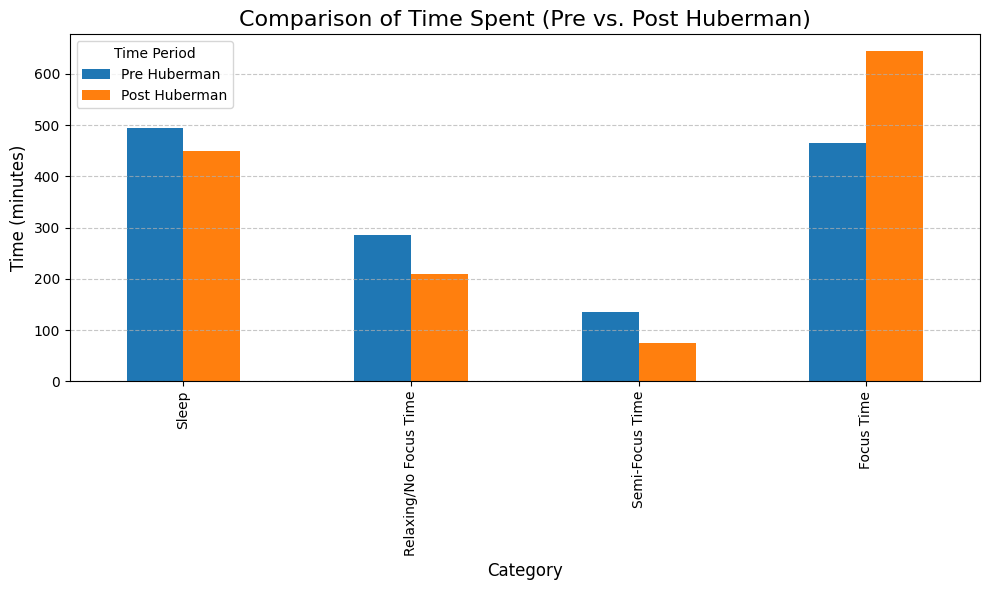

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data as a list of dictionaries
data = [
    {"Category": "Sleep", "Pre Huberman": "8:15", "Post Huberman": "7:30"},
    {"Category": "Relaxing/No Focus Time", "Pre Huberman": "4:45", "Post Huberman": "3:30"},
    {"Category": "Semi-Focus Time", "Pre Huberman": "2:15", "Post Huberman": "1:15"},
    {"Category": "Focus Time", "Pre Huberman": "7:45", "Post Huberman": "10:45"},
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Function to convert "hours:minutes" into total minutes
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

# Apply the conversion to relevant columns
for col in ["Pre Huberman", "Post Huberman"]:
    df[col] = df[col].apply(time_to_minutes)

# Print the resulting DataFrame for verification
print(df)

# Visualization
df.set_index("Category").plot(kind="bar", figsize=(10, 6))

# Customize the plot
plt.title("Comparison of Time Spent (Pre vs. Post Huberman)", fontsize=16)
plt.ylabel("Time (minutes)", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.legend(title="Time Period")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


## Actual Data Viz and Data

In [ ]:
import pandas as pd

data = [
    {"Category": "Sleep", "Pre Huberman": "8:15", "Post Huberman": "7:30"},
    {"Category": "Relaxing/No Focus", "Pre Huberman": "4:45", "Post Huberman": "3:30"},
    {"Category": "Semi-Focus Time", "Pre Huberman": "2:15", "Post Huberman": "1:15"},
    {"Category": "Focus Time", "Pre Huberman": "7:45", "Post Huberman": "10:45"},
    {"Category": "Exercise", "Pre Huberman": "1:00", "Post Huberman": "1:00"}
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Function to convert "hours:minutes" into total minutes
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

# Apply the conversion to relevant columns
for col in ["Pre Huberman", "Post Huberman"]:
    df[col] = df[col].apply(time_to_minutes)

# Transform the DataFrame to long format for Vizzu
df_long = pd.melt(
    df,
    id_vars="Category",
    value_vars=["Pre Huberman", "Post Huberman"],
    var_name="Time Period",
    value_name="Minutes"
)
df_long["Time String"] = df_long["Minutes"].apply(lambda x: f"{x // 60}:{x % 60:02}")

df_long

Category    Time Period  Minutes Time String
0              Sleep   Pre Huberman      495        8:15
1  Relaxing/No Focus   Pre Huberman      285        4:45
2    Semi-Focus Time   Pre Huberman      135        2:15
3         Focus Time   Pre Huberman      465        7:45
4           Exercise   Pre Huberman       60        1:00
5              Sleep  Post Huberman      450        7:30
6  Relaxing/No Focus  Post Huberman      210        3:30
7    Semi-Focus Time  Post Huberman       75        1:15
8         Focus Time  Post Huberman      645       10:45
9           Exercise  Post Huberman       60        1:00

In [ ]:
# import pandas and ipyvizzu
import pandas as pd
from ipyvizzu import Chart, Data, Config, Style, DisplayTarget

# initialize Chart
chart = Chart(
    width="1280px", height="720px", display=DisplayTarget.MANUAL
)

# Add data to the chart
chart_data = Data()
chart_data.add_df(df_long)
chart.animate(chart_data)

chart.animate(
    Style({
        "backgroundColor": "#000000",
        "plot": {
            "backgroundColor": "#000000",  # Make plot background black
            "marker": {
                "colorPalette": "#808080 #FFFFFF",  # Gray and white bars
                "fillOpacity": 1,
            },
            "yAxis": {
                "color": "#000000",  # Black axis line
                "label": {"color": "#FFFFFF"},  # White labels
                "title": {"color": "#FFFFFF"},
                "interlacing": {"color": "#000000"},  # Black grid background
            },
            "xAxis": {
                "color": "#000000",  # Black axis line
                "label": {"color": "#FFFFFF"},
                "title": {"color": "#FFFFFF"},
                "interlacing": {"color": "#000000"},  # Black grid background
            },
            "paddingLeft": "13em",
            "paddingRight": "0em",
        },
        "title": {"color": "#FFFFFF"},
        "legend": {
            "backgroundColor": "#000000",  # Black legend background
            "label": {
                "color": "#FFFFFF",
                "fontSize": 10,
                "fontWeight": "bold",
                },  # White legend text
            "paddingLeft": "0em",
            "paddingRight": "0em",
            "maxWidth": "110%",
        }
    })
)
# Configure the chart
chart.animate(
    Config({
        "x": ["Category", "Time Period"],
        "y": "Minutes",
        "label": "Minutes",
        "color": "Time Period",
        "geometry": "rectangle",
        "title": "Comparison of Time Spent (Pre vs. Post Huberman)"
    })
)



chart.animate(
    Style({
        "plot": {
            "backgroundColor": "#000000",  # Make plot background black
            "marker": {
                "colorPalette":  "#2A2A2A #5C5C5C #A1A1A1 #D1D1D1",  # Distinct colors for each category
                "fillOpacity": 1,
            },
        },
    }),
    Config.stackedColumn({
        "x": "Time Period",
        "y": "Minutes",
        "stackedBy": "Category",
        "label": "Minutes",
        "color": "Category",
        "geometry": "rectangle",
        "title": "Comparison of Time Spent (Pre vs. Post Huberman)"
    })
)

df_pre_huberman = df_long[df_long['Time Period'] == 'Pre Huberman']

# Add filtered data for Pre Huberman to the chart
chart_data_pre = Data()
chart_data_pre.add_df(df_pre_huberman)
chart.animate(chart_data_pre)

# Create a pie chart for Pre Huberman time period
chart.animate(
    Style({
        "plot": {
            "backgroundColor": "#000000",  # Make plot background black
            "marker": {
                "colorPalette":  "#2A2A2A #5C5C5C #A1A1A1 #D1D1D1",  # Distinct colors for each category
                "fillOpacity": 1,
            },
        },
    }),
    Config.pie({
        "angle": "Minutes",             # Angle by minutes
        "by": "Category",               # Slices by category
        "title": "Time Spent (Pre Huberman)"  # Title for Pre Huberman
    })
)

df_pre_huberman = df_long[df_long['Time Period'] == 'Post Huberman']

# Add filtered data for Pre Huberman to the chart
chart_data_pre = Data()
chart_data_pre.add_df(df_pre_huberman)
chart.animate(chart_data_pre)

# Create a pie chart for Pre Huberman time period
chart.animate(
    Config.pie({
        "angle": "Minutes",             # Angle by minutes
        "by": "Category",               # Slices by category
        "title": "Time Spent (Post Huberman)"  # Title for Pre Huberman
    })
)

# Display the chart
chart.show()